<a href="https://colab.research.google.com/github/sidkatiyar09/Data-Analytics/blob/main/capstone_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 575.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.2 MB/s eta 0:00:00
Found 7010 files belonging to 10 classes.
Found 1500 files belonging to 10 classes.
Found 1502 files belonging to 10 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1218s 11s/step - accuracy: 0.5846 - loss: 1.3056 - val_accuracy: 0.7700 -

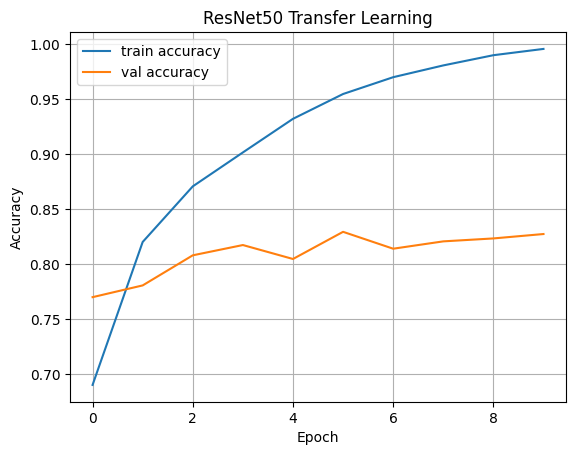

In [2]:
# RESNET50 TRAINING ON 1 MILLION IMAGES (TRANSFER LEARNING)

# ============================
# SETUP
# ============================

!pip install tensorflow opencv-python -q

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# ============================
# DATASET CONFIGURATION
# ============================

# Adjust path to your root image folder
DATA_DIR = "/content/drive/MyDrive/Capstone project 2/food_subset/"
BATCH_SIZE = 64
IMG_SIZE = (224, 224)

train_ds = image_dataset_from_directory(
    DATA_DIR + "train",
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    validation_split=None  # Assuming already pre-split
)

val_ds = image_dataset_from_directory(
    DATA_DIR + "val",
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

test_ds = image_dataset_from_directory(
    DATA_DIR + "test",
    shuffle=False,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)

# ============================
# RESNET50 TRANSFER LEARNING MODEL
# ============================

base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ============================
# TRAINING
# ============================

EPOCHS = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

# ============================
# EVALUATE ON TEST SET
# ============================

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")

# ============================
# PLOT RESULTS
# ============================

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('ResNet50 Transfer Learning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
